# **Proyecto: Arquetipos de clientes de banco**


Inicia el análisis de datos
--------------------------------------------

Importación de los datos baseTibamoa.xls ...

Dimensiones del arreglo de información
Número de registros: 215
Número de variables: 43
--------------------------------------------

Cantidad de datos null or nan por columna:

                                            #_faltantes  %_faltantes
AÑO DE APERTURA                                       0     0.000000
EDAD                                                  0     0.000000
GENERO                                                0     0.000000
ESTRATO                                               0     0.000000
ACTIVIDAD_ECONOMICA                                   0     0.000000
ESTADO_CIVIL                                          0     0.000000
RANGO EDAD                                            0     0.000000
Probabilidad_Recomendacion                            0     0.000000
Productos_Tibamoa                                     0     0.000000
Frecuencia_u

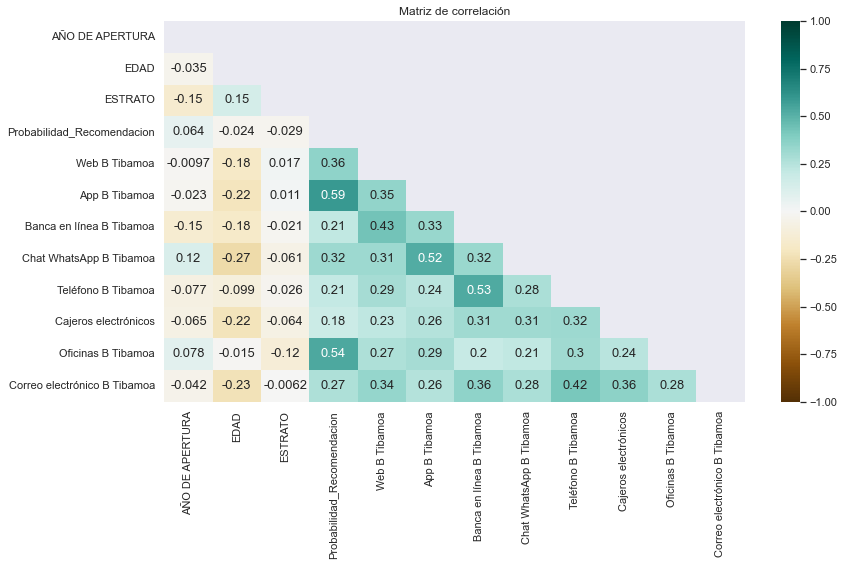

--------------------------------------------
Histogramas para las variables:


C:\Users\hfabi\anaconda3\lib\_collections_abc.py:941: MatplotlibDeprecationWarning:


The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

C:\Users\hfabi\anaconda3\lib\_collections_abc.py:941: MatplotlibDeprecationWarning:


The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

C:\Users\hfabi\anaconda3\lib\_collections_abc.py:941: MatplotlibDeprecationWarning:


The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

C:\Users\hfabi\anaconda3\lib\_collections_abc.py:941: MatplotlibDeprecationWarning:


The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

C:\Users\hfabi\anaconda3\lib\_collections_abc.py:941: MatplotlibDeprecationWarning:


The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.

C:\Users\

In [14]:
###------------------TEAM 11 --------------------###
##CARLOS ANDRES RODRIGUEZ BAYONA
##HAROLD FABIAN RODRIGUEZ TARAZONA
##JOSE EDUARDO RIVERA LAITON
##WENDY BARREDA CABRERA
###-----------------------------------------------###

!pip install -U imbalanced-learn
!pip install plotly

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
#import os
#os.chdir("/content")

inline_rc = dict(matplotlib.rcParams)
#---------------------------------------------------Datos ---------------------------------------------------------------
print('Inicia el análisis de datos')
print('--------------------------------------------')
#Carga de datos 
print('\r\nImportación de los datos baseTibamoa.xls ...')
#data = pd.read_csv("BaseTibamoa.xlsx", delimiter=',')
data = pd.read_excel('baseTibamoa.xlsx', index_col=0)  

print('\r\nDimensiones del arreglo de información')
print('Número de registros: '+ str(data.shape[0]))
print('Número de variables: '+ str(data.shape[1]))
print('--------------------------------------------')
print('\r\nCantidad de datos null or nan por columna:\r\n')
percent_missing = data.isna().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'#_faltantes': data.isna().sum(),
                                 '%_faltantes': percent_missing})
print(missing_value_df)
print('--------------------------------------------')
print('\r\nTipo de los datos:\r\n')
print(data.dtypes)

print('--------------------------------------------')
print('\r\nAnalisis de variables\r\n')
print('Estadisticas descriptivas de los datos:')
estadisticas=data.describe(include = 'all')
print(estadisticas)

print('--------------------------------------------')
print('Se procede con un analisis de todas las variables por medio de una matriz de correlación:')
correlacion = data.corr()
#sns.set(rc = {'figure.figsize':(30,30), 'font.size':12})
sns.set(rc = {'figure.figsize':(13,7), 'font.size':13})
#sns.heatmap(correlacion, annot = True)
mask = np.triu(np.ones_like(correlacion))
sns.heatmap(correlacion, vmin=-1, vmax=1, annot=True, cmap='BrBG', mask = mask)
plt.title("Matriz de correlación")
plt.show()

matplotlib.rcParams.update(inline_rc)

print('--------------------------------------------')
print('Histogramas para las variables:')

#histogramas
dfh = data
dfh.drop(dfh.columns[[8,16,39]], 1, inplace=True)
for i in list(dfh.columns.values):
    fig = px.histogram(dfh, x=data[i])
    fig.show()

***ANALISIS PRELIMINAR***
* El csv contiene 87965 observaciones y 13 variables donde la variable **cred_o_fin_aprob** es la variable dependiente.
* Existen 2 diferentes clases dentro de la variable dependiente **cred_o_fin_aprob**: sí se aprobó o no se aprobó.
* Gracias al análisis de los datos podemos observar que existen faltantes en las columnas de **acceso_sistderiego**, **destinoventa**, **cuidadotierrayanim** y **niveleducativo**. A su vez las variables con mayor número de faltantes son acceso_sistderiego y destinoventa con el 23.73% de los datos faltantes.
* Todas las variables independientes son categóricas a excepción de la variable edad.
* En el histograma de clases podemos observar que estan desbalanceadas, en teoría se deberían balancear para obtener una mejor predicción, pero para este set de datos el objetivo es realizar la imputación de datos faltantes

In [10]:
df.columns.values

array(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'hist', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46'], dtype=object)